In [1]:
!pip install -U torch==2.3.0
!pip install -U torchtext==0.18

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.2/779.2 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 102.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.12.0 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
torchvision 0.20.1+cu124 requires torch==2.5.1, but you have torch 2.3.0 which is incompatible.
torchaudio 2.5.1+cu124 requires torch==2.5.1, but you have torch 2.3.0 which is incompatible.


In [3]:
import collections
#import datasets -> not  found
import matplotlib.pyplot as plt
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import tqdm
import torchtext

In [4]:
print(torch.__version__)

2.3.0+cu121


In [5]:
import datasets

In [6]:
seed = 1234

np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

###Loading dataset

In [7]:
train,test = datasets.load_dataset('imdb',split=['train','test'])
train,test

README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

(Dataset({
     features: ['text', 'label'],
     num_rows: 25000
 }),
 Dataset({
     features: ['text', 'label'],
     num_rows: 25000
 }))

In [8]:
train.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['neg', 'pos'], id=None)}

In [9]:
train[0]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

###Tokenization

In [10]:
from torchtext.data import get_tokenizer
tokenizer = get_tokenizer('basic_english')
tokens = tokenizer('i am a boy')
tokens

/usr/local/lib/python3.11/dist-packages/torchtext/data/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


['i', 'am', 'a', 'boy']

In [11]:
def tokenizer_ex(example,tokenizer,max_length):
  tokens = tokenizer(example['text'])[:max_length]
  return {'tokens':tokens}
max_length = 256
train = train.map(tokenizer_ex,fn_kwargs={'tokenizer':tokenizer,'max_length':max_length})
test = test.map(tokenizer_ex,fn_kwargs={'tokenizer':tokenizer,'max_length':max_length})

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

In [12]:
train

Dataset({
    features: ['text', 'label', 'tokens'],
    num_rows: 25000
})

In [13]:
train.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['neg', 'pos'], id=None),
 'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)}

In [14]:
train['tokens'][0][:25]

['i',
 'rented',
 'i',
 'am',
 'curious-yellow',
 'from',
 'my',
 'video',
 'store',
 'because',
 'of',
 'all',
 'the',
 'controversy',
 'that',
 'surrounded',
 'it',
 'when',
 'it',
 'was',
 'first',
 'released',
 'in',
 '1967',
 '.']

In [15]:
train_valid_data = train.train_test_split(test_size=0.25)
train = train_valid_data['train']
valid = train_valid_data['test']

In [16]:
len(train),len(valid),len(test)

(18750, 6250, 25000)

In [17]:
#manaul vocab
def build_vocab(dataset):
  idx = 2
  word2idx = {'unk':0,
              '<PAD>':1}

  for  i in range(len(dataset)):
    text = train[i]['text']
    tokens = text.lower().split()
    for w in tokens:
      if w not in word2idx:
        word2idx[w] = idx
        idx += 1
  return   word2idx

In [18]:
vocab_manual = build_vocab(train)


In [19]:
list(vocab_manual.items())[:3]

[('unk', 0), ('<PAD>', 1), ('look,', 2)]

In [20]:
len(vocab_manual)

211350

In [21]:
#torch library
import torchtext.vocab
min_freq = 5
special_tokens = ['<unk>','<pad>']

vocab = torchtext.vocab.build_vocab_from_iterator(
    train["tokens"],
    min_freq=min_freq,
    specials=special_tokens,
)


/usr/local/lib/python3.11/dist-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.11/dist-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


In [22]:
len(vocab)

21635

In [23]:
vocab.get_itos()[:10]

['<unk>', '<pad>', 'the', '.', ',', 'a', 'and', 'of', 'to', "'"]

In [24]:
'some_token' in vocab

False

In [25]:
unk = vocab['<unk>']
pad_index = vocab['<pad>']

In [26]:
vocab.set_default_index(unk)

In [27]:
vocab['some_token']

0

In [28]:
list(vocab.get_stoi().items())[:20]

[('zwick', 21633),
 ('zing', 21632),
 ('ziggy', 21631),
 ('zhou', 21630),
 ('zavet', 21628),
 ('yvaine', 21627),
 ('yields', 21625),
 ('yasmin', 21623),
 ('yanked', 21620),
 ('yam', 21618),
 ('xmas', 21617),
 ('xena', 21616),
 ('woulda', 21608),
 ('workshop', 21605),
 ('woos', 21604),
 ('woodstock', 21603),
 ('wither', 21601),
 ('wired', 21600),
 ('winninger', 21599),
 ('wincing', 21598)]

###numericalize

In [29]:
def numericalize(ex,vocab):
  idx = vocab.lookup_indices(ex['tokens'])
  return {'idx':idx}

In [30]:
train = train.map(numericalize,fn_kwargs={'vocab':vocab})
valid = valid.map(numericalize,fn_kwargs={'vocab':vocab})
test = test.map(numericalize,fn_kwargs={'vocab':vocab})

Map:   0%|          | 0/18750 [00:00<?, ? examples/s]

Map:   0%|          | 0/6250 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

In [31]:
train

Dataset({
    features: ['text', 'label', 'tokens', 'idx'],
    num_rows: 18750
})

In [32]:
train[0]['idx'][:10]

[180, 4, 14, 10, 191, 841, 34, 7, 2, 121]

In [33]:
vocab.lookup_indices(train[0]['tokens'][:10])

[180, 4, 14, 10, 191, 841, 34, 7, 2, 121]

In [34]:
train =  train.with_format(type='torch',columns=['idx','label'])
valid =  valid.with_format(type='torch',columns=['idx','label'])
test =  test.with_format(type='torch',columns=['idx','label'])

In [35]:
train[0]['label']

tensor(1)

In [36]:
train[0]['idx'][:10]

tensor([180,   4,  14,  10, 191, 841,  34,   7,   2, 121])

In [37]:
train[0].keys()

dict_keys(['label', 'idx'])

In [38]:
def get_collate_fn(pad_index):
  def collate_fn(batch):
    batch_idxs = [i['idx'] for i in  batch]
    batch_idxs = nn.utils.rnn.pad_sequence(
        batch_idxs,padding_value=pad_index,batch_first=True
    )
    batch_label = [i['label'] for i in batch]
    batch_label = torch.stack(batch_label)
    batch = {'idx':batch_idxs,'label':batch_label}

    return batch
  return collate_fn



In [39]:
def get_data_loader(dataset,batch_size,pad_index,shuffle=True):
  collate_func = get_collate_fn(pad_index)
  data_loader = torch.utils.data.DataLoader(
      batch_size=batch_size,
      dataset=dataset,
      collate_fn = collate_func,
      shuffle=shuffle
  )
  return data_loader

In [40]:

batch_size = 512

train_data_loader = get_data_loader(train, batch_size, pad_index, shuffle=False)
valid_data_loader = get_data_loader(valid, batch_size, pad_index)
test_data_loader = get_data_loader(test, batch_size, pad_index)



In [41]:
class NBW(nn.Module):
    def __init__(self,vocab,embed_dim,output,pad_index):
        super(NBW,self).__init__()
        self.embedding = nn.Embedding(vocab,embed_dim,pad_index)
        self.fc = nn.Linear(embed_dim,output)
    def forward(self,idx):
        #idx -> [batch_size,seq_len]
        embed =  self.embedding(idx) #-> [batch_size,seq_len,embedding_dim]
        pooling = embed.mean(dim=1)#-> [batch_size,embedding_diim]
        out = self.fc(pooling) #-> [batch_size,output]
        return  out

In [42]:
len(train['label'].unique())

2

In [43]:
vocab_len = len(vocab)
embedding_dim = 300
output = len(train['label'].unique())

model = NBW(vocab_len,embedding_dim,output,pad_index)
model


NBW(
  (embedding): Embedding(21635, 300, padding_idx=1)
  (fc): Linear(in_features=300, out_features=2, bias=True)
)

In [44]:
sum(p.numel() for p in model.parameters() if p.requires_grad)

6491102

In [45]:
vectors = torchtext.vocab.GloVe()
hello = vectors.get_vecs_by_tokens('hello')
hello.shape

.vector_cache/glove.840B.300d.zip: 2.18GB [06:50, 5.31MB/s]                            
100%|█████████▉| 2196016/2196017 [03:52<00:00, 9434.94it/s]


torch.Size([300])

In [46]:
pretrained_embedding = vectors.get_vecs_by_tokens(vocab.get_itos())

In [47]:
pretrained_embedding.shape

torch.Size([21635, 300])

In [48]:
model.embedding.weight

Parameter containing:
tensor([[-0.1117, -0.4966,  0.1631,  ..., -0.5592, -0.4480, -0.6476],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.7882, -1.6625, -0.7064,  ..., -1.5841, -0.3711, -1.2338],
        ...,
        [-0.1833,  0.2245, -0.3846,  ..., -0.8093, -1.5803,  2.2097],
        [ 0.8763, -0.4503, -0.3297,  ...,  1.0524, -0.3182, -0.0381],
        [-0.7596,  0.6286,  0.0057,  ..., -0.8484, -0.1224,  1.3181]],
       requires_grad=True)

In [49]:
model.embedding.weight.data =  pretrained_embedding

In [50]:
model.embedding.weight,pretrained_embedding

(Parameter containing:
 tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.2720, -0.0620, -0.1884,  ...,  0.1302, -0.1832,  0.1323],
         ...,
         [ 0.1662,  0.2845,  0.4958,  ..., -0.5733, -0.4675, -0.0965],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.2701,  0.6335,  0.2016,  ..., -0.4568,  0.5783, -0.5545]],
        requires_grad=True),
 tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.2720, -0.0620, -0.1884,  ...,  0.1302, -0.1832,  0.1323],
         ...,
         [ 0.1662,  0.2845,  0.4958,  ..., -0.5733, -0.4675, -0.0965],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.2701,  0.6335,  0.2016,  ..., -0.4568,  0.5783, -0.5545]]))

In [51]:
optimizer = optim.Adam(model.parameters(),lr=1e-3)
criterion = nn.CrossEntropyLoss()

In [52]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [53]:
model.to(device)
criterion.to(device)

CrossEntropyLoss()

In [54]:
def train_model(model,optimizer,criterion,data_loader,device):
    model.train()
    epoch_loss=[]
    epoch_acc = []
    for  batch in tqdm.tqdm(data_loader,desc='training...'):
        idx = batch['idx'].to(device)
        label = batch['label'].to(device)
        predictions = model(idx)
        loss = criterion(predictions,label)
        acc = get_accuracy(predictions,label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss.append(loss.item())
        epoch_acc.append(acc.item())
    return  np.mean(epoch_loss),np.mean(epoch_acc)        
        

In [55]:
def  evaluate(model,device,criterion,data_loader):
    model.eval()
    epoch_loss = []
    epoch_acc = []
    with torch.inference_mode():
        for batch in tqdm.tqdm(data_loader,desc='testing...'):
            idx = batch['idx'].to(device)
            label = batch['label'].to(device)
            preds = model(idx)
            loss = criterion(preds,label)
            acc = get_accuracy(preds,label)
            epoch_loss.append(loss.item())
            epoch_acc.append(acc.item())
    return  np.mean(epoch_loss),np.mean(epoch_acc)        

In [56]:
def get_accuracy(preds,label):
    bz,_= preds.shape
    pred_classes = preds.argmax(dim=-1)
    corrections = pred_classes.eq(label).sum()
    return  corrections/bz

In [57]:
train.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['neg', 'pos'], id=None),
 'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'idx': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None)}

In [58]:
epochs = 10
best_valid_loss = float('inf')
metrics = collections.defaultdict(list)

for epoch in range(epochs):
    train_loss,train_accuracy =  train_model(model,optimizer,criterion,train_data_loader,device)
    valid_loss,valid_accuracy = evaluate(model,device,criterion,valid_data_loader)
    metrics['train_loss'].append(train_loss)
    metrics['test_loss'].append(valid_loss)
    metrics['train_accuracy'].append(train_accuracy)
    metrics['test_accuracy'].append(valid_accuracy)
    if valid_loss<best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(),'nbw.pt')
    if (epoch+1)%1 ==0  :
        print(f'Epoch; {epoch}/{epochs}| Train_loss: {train_loss}| Train_accurary: {train_accuracy}') 
        print(f'Test_loss: {valid_loss} | Test_accuracy: {valid_accuracy}')

testing...: 100%|██████████| 13/13 [00:00<00:00, 35.12it/s]


Epoch; 0/10| Train_loss: 0.6776673229965003| Train_accurary: 0.6493541372788919
Test_loss: 0.659519035082597 | Test_accuracy: 0.6965512770872849


testing...: 100%|██████████| 13/13 [00:00<00:00, 58.29it/s]


Epoch; 1/10| Train_loss: 0.6347504048734098| Train_accurary: 0.7369217308791908
Test_loss: 0.6069358403866107 | Test_accuracy: 0.7482311312968914


testing...: 100%|██████████| 13/13 [00:00<00:00, 58.28it/s]


Epoch; 2/10| Train_loss: 0.5713084855595151| Train_accurary: 0.7739218795621717
Test_loss: 0.545107167500716 | Test_accuracy: 0.7812386613625747


testing...: 100%|██████████| 13/13 [00:00<00:00, 58.64it/s]


Epoch; 3/10| Train_loss: 0.4997060854692717| Train_accurary: 0.8178371464883959
Test_loss: 0.4798896679511437 | Test_accuracy: 0.8204712455089276


testing...: 100%|██████████| 13/13 [00:00<00:00, 56.85it/s]


Epoch; 4/10| Train_loss: 0.433595928791407| Train_accurary: 0.8505382956685247
Test_loss: 0.4273394552560953 | Test_accuracy: 0.8444841962594253


testing...: 100%|██████████| 13/13 [00:00<00:00, 58.79it/s]


Epoch; 5/10| Train_loss: 0.3801231384277344| Train_accurary: 0.8722892629133688
Test_loss: 0.3902283815237192 | Test_accuracy: 0.8546750270403348


testing...: 100%|██████████| 13/13 [00:00<00:00, 58.40it/s]


Epoch; 6/10| Train_loss: 0.3387684516004614| Train_accurary: 0.8851719853040334
Test_loss: 0.3671027719974518 | Test_accuracy: 0.8593579943363483


testing...: 100%|██████████| 13/13 [00:00<00:00, 56.82it/s]


Epoch; 7/10| Train_loss: 0.3060924459148098| Train_accurary: 0.8964272705284325
Test_loss: 0.34809785852065456 | Test_accuracy: 0.8653676097209637


testing...: 100%|██████████| 13/13 [00:00<00:00, 58.70it/s]


Epoch; 8/10| Train_loss: 0.2793323184187348| Train_accurary: 0.9069873593948983
Test_loss: 0.3279503056636223 | Test_accuracy: 0.8729278170145475


testing...: 100%|██████████| 13/13 [00:00<00:00, 58.87it/s]

Epoch; 9/10| Train_loss: 0.25674985268631495| Train_accurary: 0.9143891817814594
Test_loss: 0.3160778238223149 | Test_accuracy: 0.8771600631567148


In [59]:
metrics

defaultdict(list,
            {'train_loss': [0.6776673229965003,
              0.6347504048734098,
              0.5713084855595151,
              0.4997060854692717,
              0.433595928791407,
              0.3801231384277344,
              0.3387684516004614,
              0.3060924459148098,
              0.2793323184187348,
              0.25674985268631495],
             'test_loss': [0.659519035082597,
              0.6069358403866107,
              0.545107167500716,
              0.4798896679511437,
              0.4273394552560953,
              0.3902283815237192,
              0.3671027719974518,
              0.34809785852065456,
              0.3279503056636223,
              0.3160778238223149],
             'train_accuracy': [0.6493541372788919,
              0.7369217308791908,
              0.7739218795621717,
              0.8178371464883959,
              0.8505382956685247,
              0.8722892629133688,
              0.8851719853040334,
              0.89

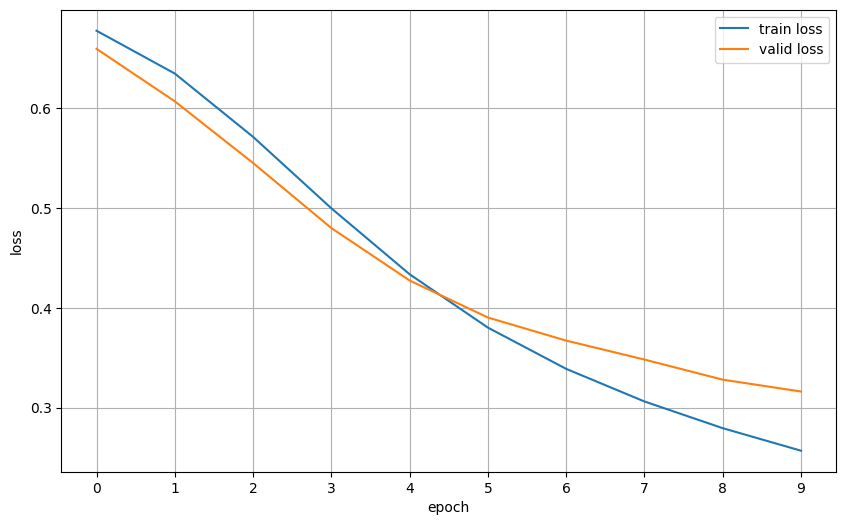

In [60]:

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(metrics["train_loss"], label="train loss")
ax.plot(metrics["test_loss"], label="valid loss")
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_xticks(range(epochs))
ax.legend()
ax.grid()


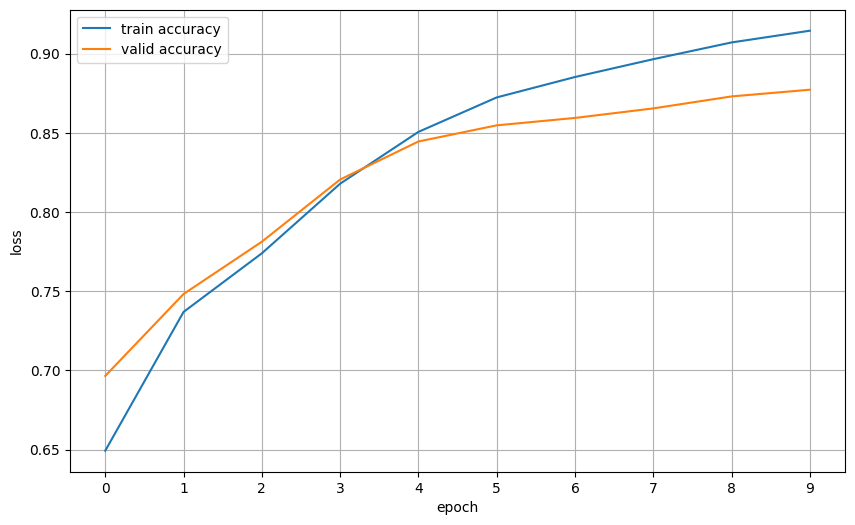

In [61]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(metrics["train_accuracy"], label="train accuracy")
ax.plot(metrics["test_accuracy"], label="valid accuracy")
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_xticks(range(epochs))
ax.legend()
ax.grid()

In [62]:
model.load_state_dict(torch.load('nbw.pt'))
test_loss,test_acc = evaluate(model,device,criterion,test_data_loader)
print(f'test_loss: {test_loss},   test_acc: {test_acc}')

testing...: 100%|██████████| 49/49 [00:01<00:00, 33.74it/s]

test_loss: 0.35344937747838545,   test_acc: 0.8556800813091044


In [63]:
def predict(text,model,tokenizer,device,vocab):
    tokens = tokenizer(text)
    idx = vocab.lookup_indices(tokens)
    tensor = torch.LongTensor(idx).unsqueeze(0).to(device)
    pred = model(tensor).squeeze(0)
    prob = torch.softmax(pred,dim=-1)
    class_pred  = pred.argmax(dim=-1).item()
    pred_prob = prob[class_pred].item()
    return class_pred,pred_prob

In [64]:
train['label'].unique()
label = ['Neg','pos']

In [65]:
reviews = [
    # 1
    "Incredible movie! The acting was superb, and the plot kept me on the edge of my seat. Definitely a must-watch!",
    # 2
    "Terrible movie. The plot was predictable, and the acting was flat. I was bored halfway through.",
    # 3
    "I loved every second of it. The direction, screenplay, and performances were just outstanding. Highly recommend!",
    # 4
    "I don’t understand the hype. The story was weak, and the characters felt one-dimensional. Definitely not worth the watch.",
    # 5
    "An absolute masterpiece! The characters were so well-developed, and the story was gripping from start to finish.",
    # 6
    "Waste of time. It dragged on forever, and the pacing was horrible. The dialogue was cringeworthy at times.",
    # 7
    "This film exceeded all my expectations. Fantastic action sequences and a story that actually makes you think.",
    # 8
    "Very disappointing. The special effects couldn’t save this one. The plot was all over the place and not engaging at all.",
    # 9
    "An emotionally charged movie with brilliant performances. It’s rare to find such a deep and powerful film. 10/10!",
    # 10
    "The film didn’t make sense. The plot had too many holes, and the characters were unbelievable. Avoid it!",
    # 11
    "I was completely absorbed by this movie. The plot was fresh and exciting, and the cinematography was stunning.",
    # 12
    "Boring and unoriginal. This movie tried too hard to be deep but ended up being a mess.",
    # 13
    "A great film that blends drama and action perfectly. A must-see for any fan of the genre.",
    # 14
    "I wanted to like this film, but it was a huge letdown. The script was weak, and the pacing was painfully slow.",
    # 15
    "I thoroughly enjoyed it. The storyline was compelling, and the acting was top-notch. A great cinematic experience.",
    # 16
    "I really didn’t enjoy this. The story was too predictable, and the characters felt like cardboard cutouts.",
    # 17
    "What a beautiful movie! From the soundtrack to the visuals, everything was top quality. Highly recommend watching it.",
    # 18
    "I was expecting more, but this movie failed to deliver. The performances were stiff, and the story lacked depth.",
    # 19
    "Such a feel-good film! It left me smiling all the way through. The performances were outstanding, especially the lead actor.",
    # 20
    "The movie was just plain bad. The acting was wooden, and the direction was all over the place. Not worth your time."
]


In [66]:
for text in reviews:
    class_pred,prob = predict(text,model,tokenizer,device,vocab)
    print(f'Pos or neg -> {label[class_pred]}')
    print(f'Probability -> {prob}')

Pos or neg -> pos
Probability -> 0.9995630383491516
Pos or neg -> Neg
Probability -> 1.0
Pos or neg -> pos
Probability -> 0.9999604225158691
Pos or neg -> Neg
Probability -> 0.9661660194396973
Pos or neg -> pos
Probability -> 0.949195384979248
Pos or neg -> Neg
Probability -> 0.9997920393943787
Pos or neg -> pos
Probability -> 0.9999929666519165
Pos or neg -> Neg
Probability -> 0.9998279809951782
Pos or neg -> pos
Probability -> 0.9999996423721313
Pos or neg -> Neg
Probability -> 0.999969482421875
Pos or neg -> pos
Probability -> 0.8442798852920532
Pos or neg -> Neg
Probability -> 0.9999998807907104
Pos or neg -> pos
Probability -> 0.9999979734420776
Pos or neg -> Neg
Probability -> 0.9999951124191284
Pos or neg -> pos
Probability -> 0.9997562766075134
Pos or neg -> Neg
Probability -> 0.9967183470726013
Pos or neg -> pos
Probability -> 0.9999462366104126
Pos or neg -> Neg
Probability -> 0.8754857182502747
Pos or neg -> pos
Probability -> 0.9980910420417786
Pos or neg -> Neg
Probability